# Hough Transform for tree count

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

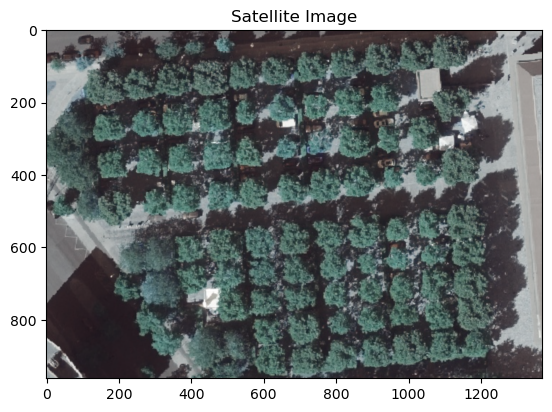

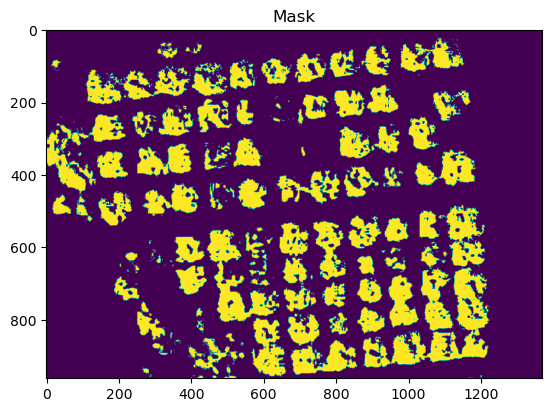

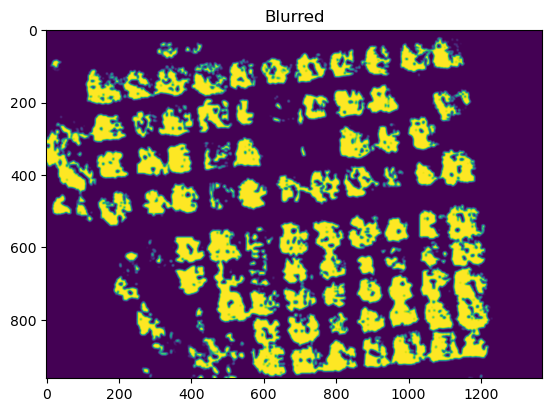

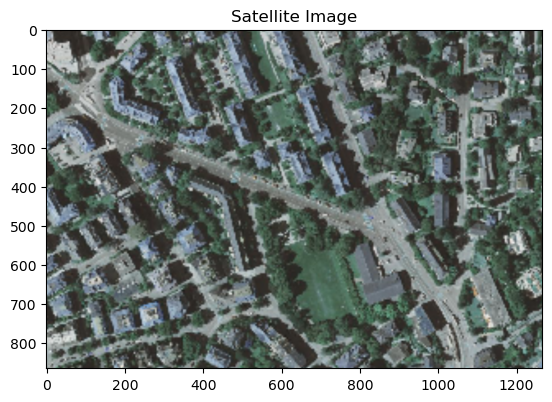

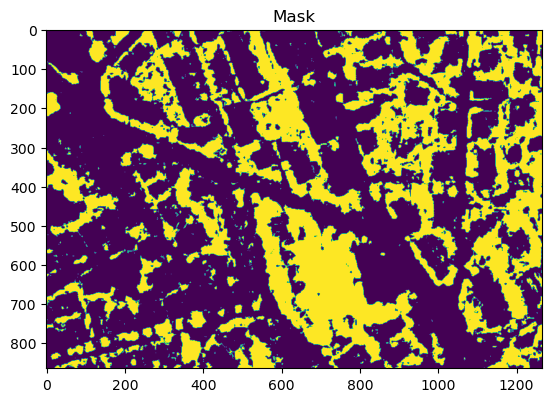

In [454]:
image = cv2.imread('./Trees Germany.png')
plt.title("Satellite Image")
plt.imshow(image)
plt.show()
# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Green colour range
lower_green = np.array([35, 30, 30])
upper_green = np.array([85, 255, 255])

# lower_green = np.array([37, 30, 30])
# upper_green = np.array([80, 255, 255])

# Create a mask for green color
mask = cv2.inRange(hsv, lower_green, upper_green)

#  Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(mask, (9, 9), 2)

plt.title("Mask")
plt.imshow(mask)
plt.show()

plt.title("Blurred")
plt.imshow(blurred)
plt.show()

image2 = cv2.imread('./DetectTree 2.png')
plt.title("Satellite Image")
plt.imshow(image2)
plt.show()

hsv2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)

mask2 = cv2.inRange(hsv2, lower_green, upper_green)

plt.title("Mask")
plt.imshow(mask2)
plt.show()

# Circular Shape Detection

Number of Circles:  163


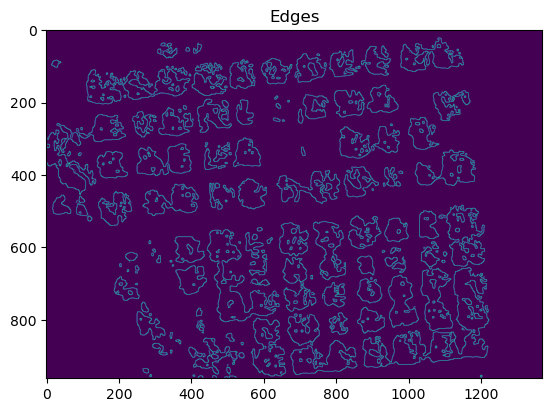

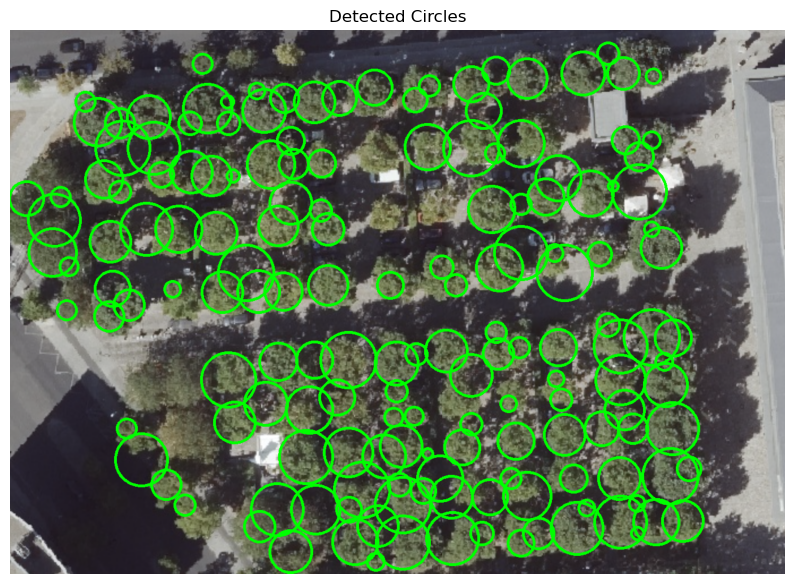

In [370]:
# Edge detection
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)
plt.title("Edges")

# Detect circles using Hough Transform
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 
                           dp=1.1, minDist=35,
                           param1=60, param2=24, 
                           minRadius=5, maxRadius=50)

output = image.copy()

# If circles are detected, draw them
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

circle_count = 0
for circle in circles:
    circle_count += 1
print("Number of Circles: ", circle_count)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis("off")
plt.show()

# Tree Counting (Not finished)

In [371]:
def is_circle_green(image, circle, green_mask):
    x, y, r = circle
    mask_circle = np.zeros_like(green_mask)
    cv2.circle(mask_circle, (x, y), r, 255, thickness=-1)
    green_pixels = cv2.countNonZero(cv2.bitwise_and(green_mask, green_mask, mask=mask_circle))
    total_pixels = np.pi * (r ** 2)
    green_ratio = green_pixels / total_pixels
    return green_ratio > 0.5  # Threshold for green area

# count trees
tree_count = 0
if circles is not None:
    for circle in circles:
        if is_circle_green(image, circle, mask):
            tree_count += 1

print(f"Number of trees detected: {tree_count}")

Number of trees detected: 104


# Connected Components Analysis

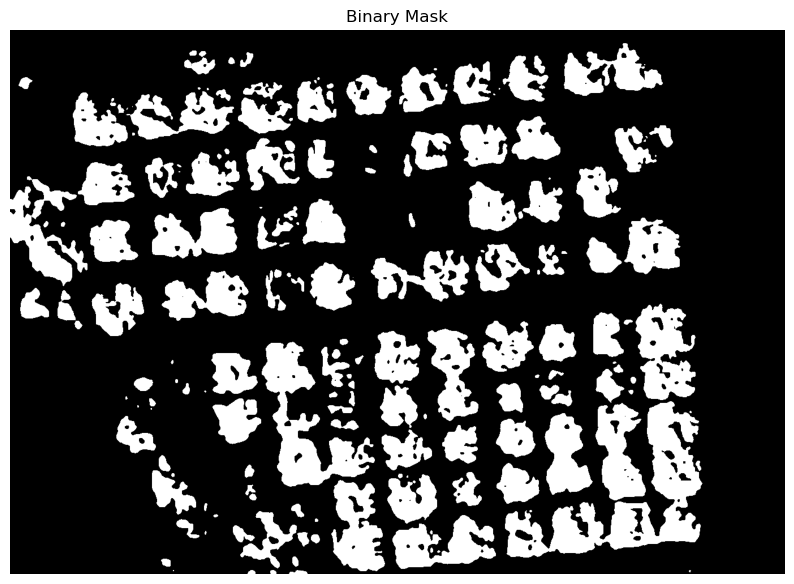

In [380]:
threshold_value = 100
_, binary_mask = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 10))
plt.imshow(binary_mask, cmap='gray')
plt.title("Binary Mask")
plt.axis("off")
plt.show()

Number of connected components (trees) detected: 178


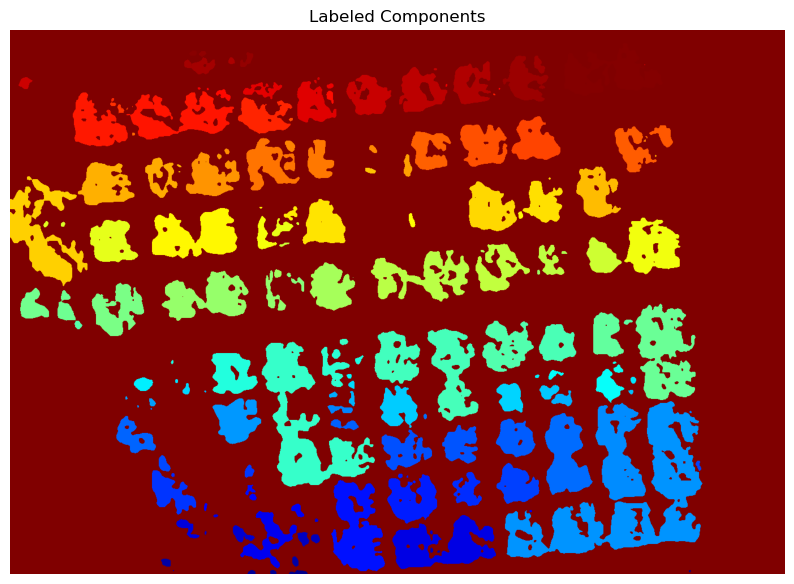

In [381]:
num_labels, labels_im = cv2.connectedComponents(binary_mask)

print(f"Number of connected components (trees) detected: {num_labels - 1}")  # Subtract 1 to ignore the background component

# Visualize the labeled components
labeled_img = cv2.applyColorMap((labels_im * 255 // num_labels).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(10, 10))
plt.imshow(labeled_img)
plt.title("Labeled Components")
plt.axis("off")
plt.show()

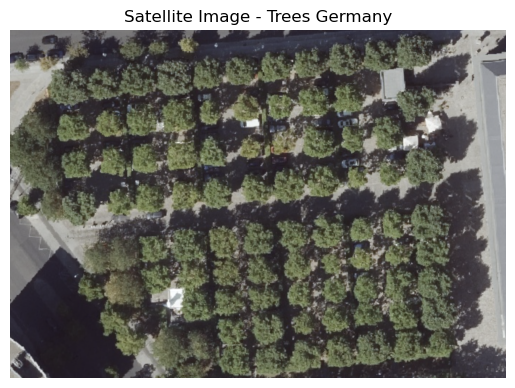

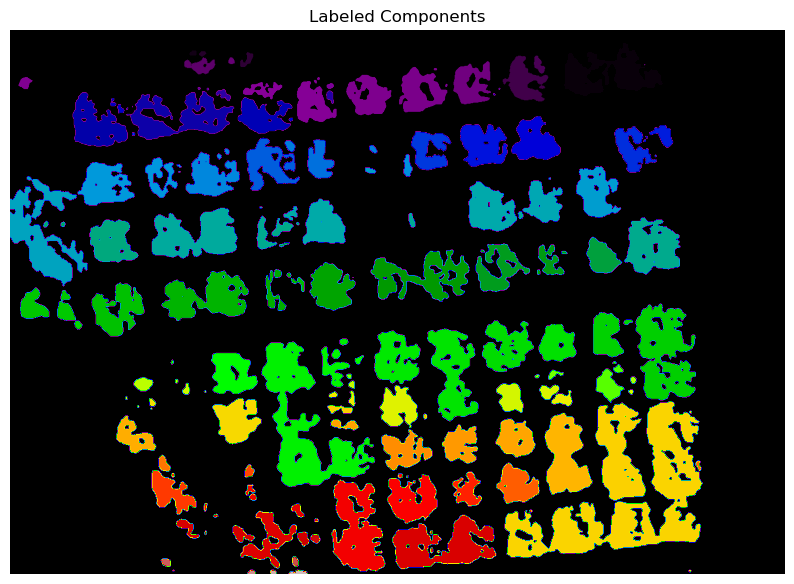

Number of trees detected: 178


In [386]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops # type: ignore

# Load the images
image1 = cv2.imread('./Trees Germany.png')
image2 = cv2.imread('./DetectTree 2.png')

def process_image(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Green colour range
    lower_green = np.array([35, 30, 30])
    upper_green = np.array([85, 255, 255])

    # Create a mask for green color
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(mask, (9, 9), 2)

    # Threshold the blurred image to create a binary mask
    threshold_value = 100
    _, binary_mask = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)

    # Label connected components
    labeled_mask = label(binary_mask)

    # Plot the labeled mask to visualize the connected components
    plt.figure(figsize=(10, 8))
    plt.imshow(labeled_mask, cmap='nipy_spectral')
    plt.title('Labeled Components')
    plt.axis('off')
    plt.show()

    # Count the number of tree instances
    tree_count = len(regionprops(labeled_mask))
    print(f"Number of trees detected: {tree_count}")

# Process the first image
plt.title("Satellite Image - Trees Germany")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
process_image(image1)

# # Process the second image
# plt.title("Satellite Image - DetectTree 2")
# plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()
# process_image(image2)


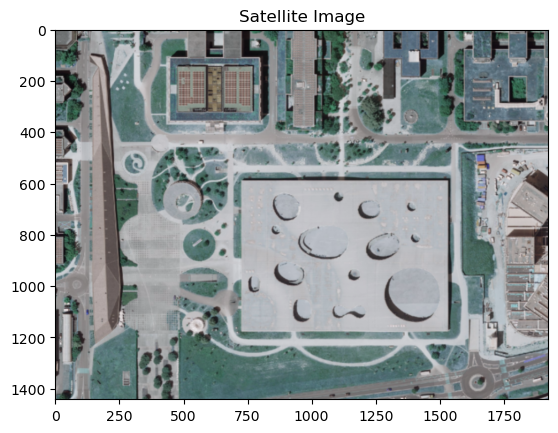

In [204]:
image2 = cv2.imread('./DetectTree.png')
plt.title("Satellite Image")
plt.imshow(image)
plt.show()

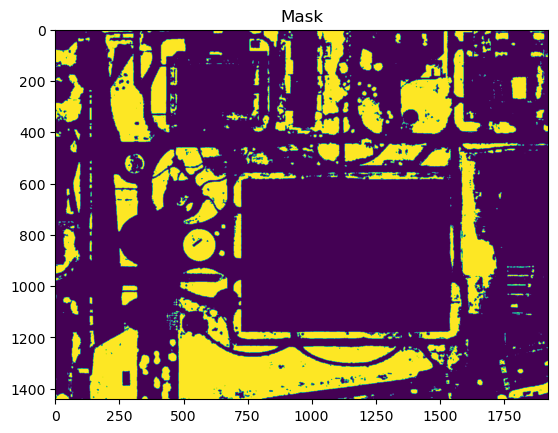

In [207]:
hsv2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)

mask2 = cv2.inRange(hsv2, lower_green, upper_green)

plt.title("Mask")
plt.imshow(mask2)
plt.show()

# Density Map Regression

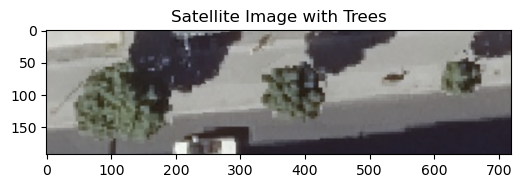

In [249]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image
image_path = './Tree Germany Simple.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Satellite Image with Trees')
plt.show()


In [359]:
import pandas as pd

# Load the CSV file
csv_path = './Dense Germany.csv'
annotations_df = pd.read_csv(csv_path)

# Extract the coordinates from the CSV file
points = []
for index, row in annotations_df.iterrows():
    shape_attributes = eval(row['region_shape_attributes'])
    x, y = shape_attributes['cx'], shape_attributes['cy']
    points.append((x, y))


In [360]:
print(f"Image shape: {image.shape}")
max_x = max(point[0] for point in points)
max_y = max(point[1] for point in points)
print(f"Max x in annotations: {max_x}")
print(f"Max y in annotations: {max_y}")

Image shape: (684, 804, 3)
Max x in annotations: 747
Max y in annotations: 653


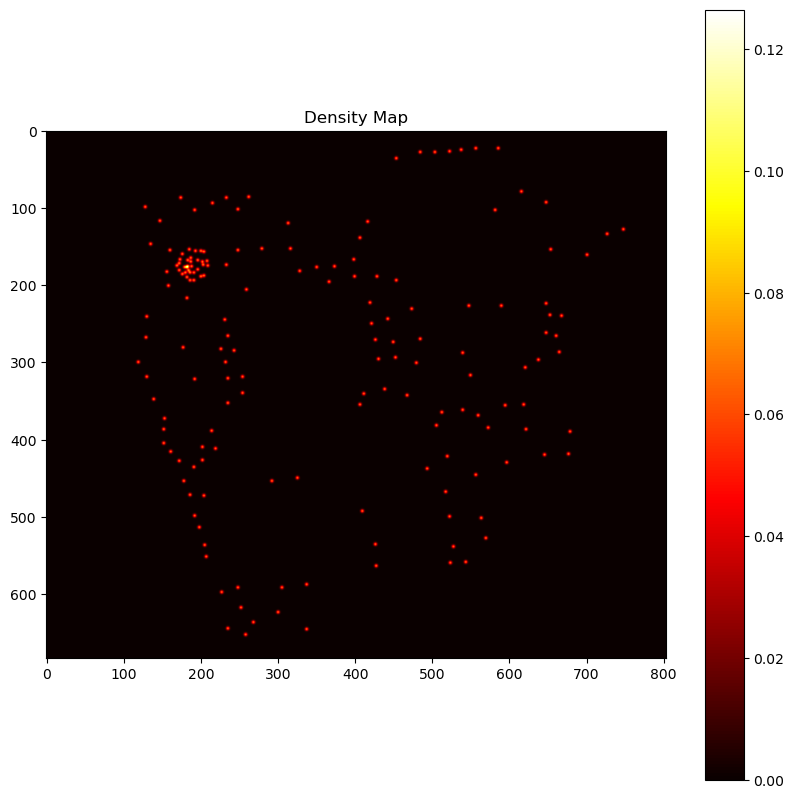

In [361]:
def create_density_map(image_shape, points, sigma=1.5):
    density_map = np.zeros(image_shape, dtype=np.float32)
    for point in points:
        density_map[int(point[1]), int(point[0])] = 1
    density_map = cv2.GaussianBlur(density_map, (0, 0), sigma)
    return density_map

# Load the image to get its shape
image_path = './Tree Germany 2.png'  
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_shape = image.shape[:2]

# Generate the density map
density_map = create_density_map(image_shape, points)

# Display the density map
plt.figure(figsize=(10, 10))
plt.imshow(density_map, cmap='hot')
plt.colorbar()
plt.title('Density Map')
plt.show()

# Density Map Generation for Labelled Kaggle Data

2024-06-26 10:10:06.114056: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


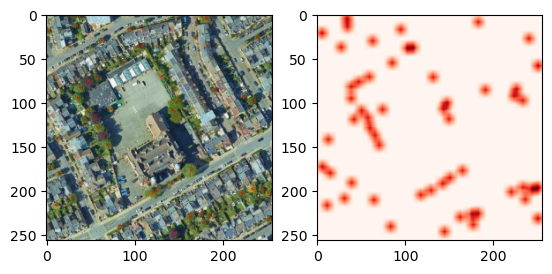

Total count of objects: 54.999996


In [410]:
import numpy as np
import tensorflow as tf
from glob import glob
import os

IMG_SIZE = (256, 256)

def gen_example(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    label_path = img_path.replace('/images/', '/labels/').replace('.jpeg', '.txt')
    labels = np.loadtxt(label_path, delimiter=' ')
    label_wh = labels[:, [3, 4]]
    label_xy = labels[:, [1, 2]]
    boxes = np.hstack([label_xy - 0.5 * label_wh, label_xy + 0.5 * label_wh])
    boxes = boxes * (img.shape[:2] + img.shape[:2])
    K_loc = 0.5 * (boxes[:, [2, 3]] + boxes[:, [0, 1]])
    K_bw = 0.5 * (boxes[:, [2, 3]] - boxes[:, [0, 1]])
    ys, xs = np.ogrid[0:img.shape[0]:IMG_SIZE[0] * 1j, 0:img.shape[1]:IMG_SIZE[1] * 1j]
    dens = 0
    for (loc_x, loc_y), (bw_x, bw_y) in zip(K_loc, K_bw):
        bw_x, bw_y = 10, 10  # use constant rather than actual size for simplicity
        dens_update = np.clip(1 - np.abs(loc_x - xs) / bw_x, 0, 1) * np.clip(1 - np.abs(loc_y - ys) / bw_y, 0, 1)
        dens_update = dens_update * 1 / dens_update.sum()  # normalize
        dens = dens + dens_update
    return img, dens

def gen_data(subpath='train'):
    def gen():
        img_paths = glob(f'/Users/ozzy/Desktop/QBE/Notebooks/archive/{subpath}/images/*.jpeg')
        if not img_paths:
            raise ValueError(f"No images found in directory: /Users/ozzy/Desktop/QBE/Notebooks/archive/{subpath}/images/")
        for img_path in img_paths:
            try:
                img, dens = gen_example(img_path)
                yield img, dens
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    return gen

train_ds = tf.data.Dataset.from_generator(
    gen_data('train'),
    output_signature=(
        tf.TensorSpec(shape=IMG_SIZE + (3,), dtype=tf.float32),
        tf.TensorSpec(shape=IMG_SIZE, dtype=tf.float32)
    )
).shuffle(100).batch(32).prefetch(1).cache()

val_ds = tf.data.Dataset.from_generator(
    gen_data('valid'),
    output_signature=(
        tf.TensorSpec(shape=IMG_SIZE + (3,), dtype=tf.float32),
        tf.TensorSpec(shape=IMG_SIZE, dtype=tf.float32)
    )
).shuffle(1000).batch(32).prefetch(1).cache()

test_ds = tf.data.Dataset.from_generator(
    gen_data('test'),
    output_signature=(
        tf.TensorSpec(shape=IMG_SIZE + (3,), dtype=tf.float32),
        tf.TensorSpec(shape=IMG_SIZE, dtype=tf.float32)
    )
).batch(32).prefetch(1).cache()

import matplotlib.pyplot as plt

# Make sure there are images in the dataset
if len(list(train_ds.as_numpy_iterator())) == 0:
    raise ValueError("No images in the training dataset.")

img, dens = next(train_ds.unbatch().as_numpy_iterator())
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(dens, cmap="Reds")
plt.show()

total_count = np.sum(dens)
print("Total count of objects:", total_count)

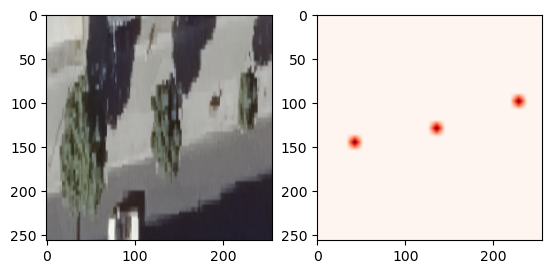

Tree Count: 3.0


In [453]:
import numpy as np
import tensorflow as tf
from glob import glob
import os
import matplotlib.pyplot as plt

IMG_SIZE = (256, 256)

def gen_example(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_png(img)  # Use tf.io.decode_png if images are PNG
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    # Convert RGBA to RGB if necessary
    if img.shape[-1] == 4:
        img = img[:, :, :3]
    
    img = tf.image.resize(img, IMG_SIZE)
    label_path = img_path.replace('/images/', '/labels/').replace('.png', '.txt')
    labels = np.loadtxt(label_path, delimiter=' ')
    label_wh = labels[:, [3, 4]]
    label_xy = labels[:, [1, 2]]
    boxes = np.hstack([label_xy - 0.5 * label_wh, label_xy + 0.5 * label_wh])
    boxes = boxes * (img.shape[:2] + img.shape[:2])
    K_loc = 0.5 * (boxes[:, [2, 3]] + boxes[:, [0, 1]])
    K_bw = 0.5 * (boxes[:, [2, 3]] - boxes[:, [0, 1]])
    ys, xs = np.ogrid[0:img.shape[0]:IMG_SIZE[0] * 1j, 0:img.shape[1]:IMG_SIZE[1] * 1j]
    dens = np.zeros(IMG_SIZE)
    for (loc_x, loc_y), (bw_x, bw_y) in zip(K_loc, K_bw):
        bw_x, bw_y = 10, 10  # use constant rather than actual size for simplicity
        dens_update = np.clip(1 - np.abs(loc_x - xs) / bw_x, 0, 1) * np.clip(1 - np.abs(loc_y - ys) / bw_y, 0, 1)
        dens_update /= dens_update.sum()  # Normalize the update
        dens = dens + dens_update
    return img, dens

def gen_data(subpath='train'):
    def gen():
        img_paths = glob(f'/Users/ozzy/Desktop/QBE/Notebooks/{subpath}/images/*.png')  # Adjust extension if needed
        if not img_paths:
            raise ValueError(f"No images found in directory: /Users/ozzy/Desktop/QBE/Notebooks/{subpath}/images/")
        for img_path in img_paths:
            try:
                img, dens = gen_example(img_path)
                yield img, dens
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    return gen

train_ds = tf.data.Dataset.from_generator(
    gen_data('train'),
    output_signature=(
        tf.TensorSpec(shape=IMG_SIZE + (3,), dtype=tf.float32),
        tf.TensorSpec(shape=IMG_SIZE, dtype=tf.float32)
    )
).shuffle(100).batch(32).prefetch(1).cache()

# Visualize one example from the dataset
img, dens = next(iter(train_ds.unbatch().batch(1)))
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img[0])
axs[1].imshow(dens[0], cmap="Reds")
plt.show()

# Calculate the total count from the density map
total_count = np.sum(dens)
print("Tree Count:", total_count)


# NMS

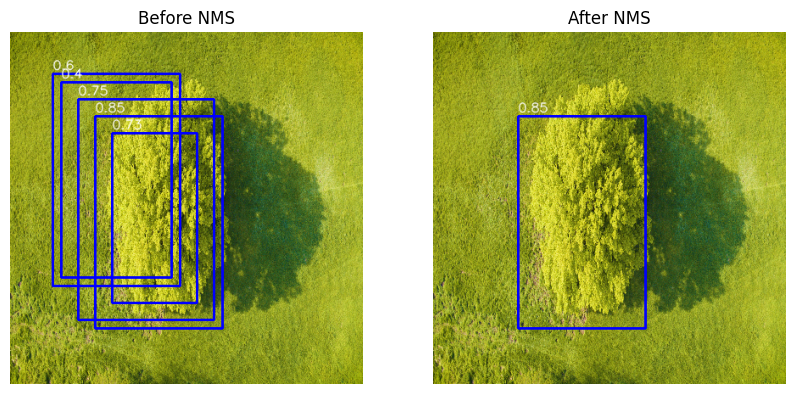

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_boxes(frame, bbox_list, color=(255, 0, 0)):
    """Draws all the boxes in the list of boxes, and displays confidence
       bbox_list = [box1,box2,box3....etc]
       box1 = [x1, y1, x2, y2, Class, confidence]
       To draw the box, we need only the coordinates,
       box1[:4] = [x1, y1, x2, y2]
       box1[5] = confidence"""
    for box in bbox_list:
        x1, y1, x2, y2 = box[:4]    # We need the (x1, y1) and (x2, y2) coordinates only
        conf = box[5]
        cv2.rectangle(frame, pt1=(x1, y1), pt2=(x2, y2), color=color, thickness=2)
        frame = cv2.putText(frame, str(conf), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 
                            (255, 255, 255), 1, cv2.LINE_AA)    # Draw the confidence on the image
    return frame

def IOU(box1, box2):
    """ We assume that the box follows the format:
        box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        where (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    area_union = area_box1 + area_box2 - area_inter
    iou = area_inter / area_union
    return iou

def nms(boxes, conf_threshold=0.85, iou_threshold=0.4):
    """
    The function performs nms on the list of boxes:
    boxes: [box1, box2, box3...]
    box1: [x1, y1, x2, y2, Class, Confidence]
    """
    bbox_list_thresholded = []    # List to contain the boxes after filtering by confidence
    bbox_list_new = []            # List to contain final boxes after nms 
    # Stage 1: (Sort boxes, and filter out boxes with low confidence)
    boxes_sorted = sorted(boxes, reverse=True, key = lambda x : x[5])    # Sort boxes according to confidence
    for box in boxes_sorted:
        if box[5] > conf_threshold:        # Check if the box has a confidence greater than the threshold
            bbox_list_thresholded.append(box)    # Append the box to the list of thresholded boxes 
        else:
            pass
    #Stage 2: (Loop over all boxes, and remove boxes with high IOU)
    while len(bbox_list_thresholded) > 0:
        current_box = bbox_list_thresholded.pop(0)        # Remove the box with highest confidence
        bbox_list_new.append(current_box)                # Append it to the list of final boxes
        for box in bbox_list_thresholded:
            if current_box[4] == box[4]:                # Check if both boxes belong to the same class
                iou = IOU(current_box[:4], box[:4])        # Calculate the IOU of the two boxes
                if iou > iou_threshold:                    # Check if the iou is greater than the threshold defined
                    bbox_list_thresholded.remove(box)    # If there is significant overlap, then remove the box
    return bbox_list_new

# Use the tree image
img = cv2.imread("/home/jupyter/ee_tree_counting/Sample Images/Oak Tree.jpg")    # Read the tree image 
img = cv2.resize(img, (416, 416))    # Resize the image to be displayed on the screen
img_nms = img.copy()                # Create a copy of the image to draw on

# Define multiple bounding boxes around different parts of the tree
bbox_tree1 = [50, 50, 200, 300, "Tree", 0.6]        # Defining the different bounding boxes
bbox_tree2 = [60, 60, 190, 290, "Tree", 0.4]
bbox_tree3 = [100, 100, 250, 350, "Tree", 0.85]
bbox_tree4 = [120, 120, 220, 320, "Tree", 0.73]
bbox_tree5 = [80, 80, 240, 340, "Tree", 0.75]
bbox_list = [bbox_tree1, bbox_tree2, bbox_tree3, bbox_tree4, bbox_tree5]    # Creating the list of the boxes

# Perform NMS but only keep the 0.85 confidence box
bbox_list_new = [box for box in bbox_list if box[5] == 0.85]    # Manually filter to keep only the 0.85 box

img = draw_boxes(img, bbox_list)                # Draw all the boxes before nms
img_nms = draw_boxes(img_nms, bbox_list_new)    # Draw only the 0.85 box after nms

# Display the images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Before NMS")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_nms, cv2.COLOR_BGR2RGB))
plt.title("After NMS")
plt.axis('off')

plt.show()
